### ¿Cómo vibra un tambor cuando lo golpeas?
> Analizar el problema de la membrana vibrante permite entender el funcionamiento de instrumentos de percusión tales como los tambores, timbales e incluso sistemas biológicos como el tímpano. 

Referencias:
 - https://en.wikipedia.org/wiki/Bessel_function
 - https://es.wikipedia.org/wiki/Vibraciones_de_una_membrana_circular
 - https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/special.html

___


Considere un tambor _(membrana)_ de radio $a$, entonces la función de onda en $\mathbb{R}^2$ para este sistema se puede escribir como,
$$ \frac{1}{v}\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

donde $u\equiv u(x,y,t)$ es el desplazamiento transversal_(elevación)_ y $v$ es la rapidez de propagación de la onda. 

La forma habitual de encontrar la solución a esta ecuación es primero hacer un cambio de coordenadas, de cartesianas a polares y posteriormente considerar el método de separación de variable, tal que 

$$ u(r, \theta, t) = R(r) \Theta(\theta) T (t)$$

Esta sustitución da como resultado tres ecuaciones diferenciales, una para cada variable de separación. Y cuyas soluciones nos ayudan a escribir los **modos normales**.

$$u_{nk}(r,\theta, t) = J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}$$
$$u^{*}_{nk}(r,\theta, t) = J_{n}(\lambda_{nk}r)(a^{*}_{nk}\cos{n\theta} + b^{*}_{nk}\sin{n\theta})\sin{(v\lambda_{nk}t)})$$

para $n = 0,1,2,\dots$, $k = 1,2,3,\dots$, donde $J_{n}$ es la **función de Bessel** de orden $n$ de primera clase.  Además,
$$\lambda_{nk} = \frac{\alpha_{nk}}{a}$$


donde $\alpha_{nk}$ es el k-ésimo cero de $J_{n}(\lambda a)=0$. Esto es consecuencia de que $u$ sea cero en la frontera de la membrana, $r = a$. 

Los coeficientes $a_{nk} , b_{nk}, a^{*}_{nk}$ y $b^{*}_{nk}$ se determinan de tal forma que cumplan con las condiciones iniciales: 

$$u(r,\theta, 0) = f(r,\theta)$$
$$u_{t}(r,\theta, 0) = g(r,\theta)$$

donde el primer termino es la geometría inicial y el segundo la rapidez inicial. Se puede demostrar que las expresiones para estos coeficientes se pueden escribir como: 

\begin{align}
a_{0k} &= \frac{1}{\pi a^2 J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Y similarmente, 

\begin{align}
a^{*}_{0k} &= \frac{1}{\pi \,v\, \alpha_{0k}\,a J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a^{*}_{nk} &= \frac{2}{\pi\, v\,\alpha_{0k}\, a J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b^{*}_{nk} &= \frac{2}{\pi\, v\,\alpha_{0k}\, a J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Estamos familiarizados con la función `coseno`, pero no tanto con la función de Bessel. Entonces, nuestra primera actividad será conocer su comportamiento. 

\begin{align}
u(r,\theta, t) &= \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}\\
&+  \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk}r)(a^{*}_{nk}\cos{n\theta} + b^{*}_{nk}\sin{n\theta})\sin{(v\lambda_{nk}t)})
\end{align}

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import special
import numpy as np
from ipywidgets import *

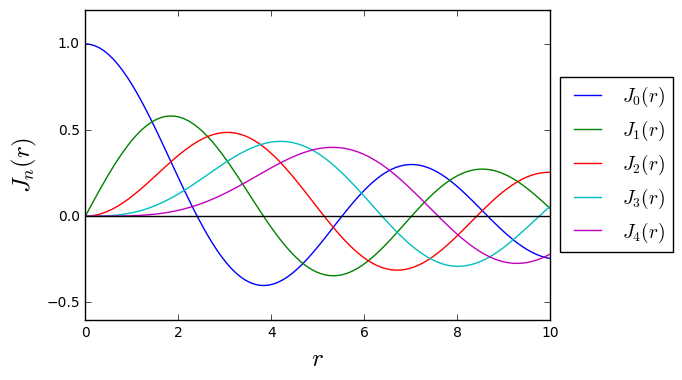

In [2]:
r = np.linspace(0, 10,100)
for n in range(5):
    plt.plot(r, special.jn(n, r), label = '$J_{%s}(r)$'%n)
plt.xlabel('$r$', fontsize = 18)
plt.ylabel('$J_{n}(r)$', fontsize = 18)
plt.axhline(y = 0, color = 'k')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 14})
plt.show()

 Por simplicidad vamos a suponer  que $r = 1$ y  determinar los ceros, significa encontrar todas las intersecciones de las curvas anteriores con el eje horizontal. 

### Ejemplo: Caso radialmente simétrico

Suponga que $a = 1$, $v = 1$ y que las condiciones iniciales son: 

$$ f(r,\theta) = 1- r^4\quad\quad g(r,\theta) = 0$$

Dado que la rapidez inicial es cero, entonces $a^{*}_{nk} = b^{*}_{nk} = 0$

In [263]:
def f_shape(r):
    return 1 - r**4

In [264]:
r = np.r_[0:1:100j]
angle = np.r_[0:2*np.pi:200j]
r_shape = f_shape(r)

In [265]:
u = np.array([np.full(len(angle), radi) for radi in r_shape])
x = np.array([var_r * np.cos(angle) for var_r in r])
y = np.array([var_r * np.sin(angle) for var_r in r])

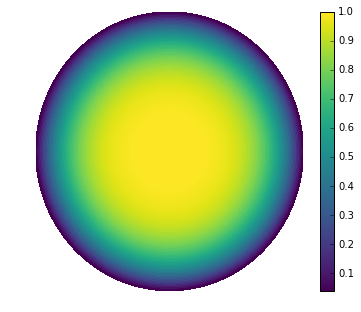

In [266]:
plt.figure(figsize = (6, 5))
plt.pcolor(x, y, u_good, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

Y la solución para el desplazamiento en el tiempo es simplemente, 
\begin{equation}
u(r,\theta, t) = \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}
\end{equation}

Entonces, solo será necesario encontrar $a_{nk}$ y $b_{nk}$.

\begin{align}
a_{0k} &= \frac{1}{\pi a^2 J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Para resolver estas integrales haremos uso de `sympy`. Iniciemos con $a_{nk}$.

### Primer caso $n>0$

In [130]:
from sympy import init_printing; init_printing(use_latex='mathjax')
import sympy as sym

In [131]:
r, theta, k  = sym.symbols('r theta k')
r, theta, k

(r, θ, k)

In [132]:
n = sym.Symbol('n', positive = True, integer=True)
n

n

In [133]:
def lamb(n,k):
    return sym.Symbol('lambda_%s%s'%(n,k), positive = True)

In [134]:
lamb(0,k)

λ₀ₖ

In [135]:
f = 1 - r**4; f

   4    
- r  + 1

In [136]:
integrand = f * sym.besselj(n, lamb(n,k) * r) * sym.cos(n *theta) * r
integrand

  ⎛   4    ⎞                           
r⋅⎝- r  + 1⎠⋅cos(n⋅θ)⋅besselj(n, λₙₖ⋅r)

In [137]:
ank = sym.Integral(integrand, (r, 0, 1), (theta, 0, 2*sym.pi))
ank

2⋅π 1                                              
 ⌠  ⌠                                              
 ⎮  ⎮   ⎛   4    ⎞                                 
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅cos(n⋅θ)⋅besselj(n, λₙₖ⋅r) dr dθ
 ⌡  ⌡                                              
 0  0                                              

In [138]:
solution = ank.doit()
solution

0

Entonces para cualquier $n>0$ no se tiene contribución. 

### Segundo caso $n=0$

In [139]:
integ = lambda n: f * sym.besselj(n, lamb(n,k) * r) * sym.cos(n*theta) * r

In [140]:
integ(0)

  ⎛   4    ⎞                  
r⋅⎝- r  + 1⎠⋅besselj(0, λ₀ₖ⋅r)

In [141]:
a0k = sym.Integral(integ(0), (r, 0, 1), (theta, 0, 2*sym.pi))
a0k

2⋅π 1                                     
 ⌠  ⌠                                     
 ⎮  ⎮   ⎛   4    ⎞                        
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅besselj(0, λ₀ₖ⋅r) dr dθ
 ⌡  ⌡                                     
 0  0                                     

In [142]:
a0k_solution = a0k.doit()
a0k_solution

    ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅bessel
2⋅π⋅⎜- ───────────────── + ────────────────── + ────────────────── - ─────────
    ⎜            2                   3                    4                   
    ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀

j(1, λ₀ₖ)⎞
─────────⎟
 5       ⎟
ₖ        ⎠

In [143]:
a0k_sol = 1/(sym.pi*sym.besselj(1, lamb(0,k))**2)*a0k_solution
a0k_sol

  ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅besselj(
2⋅⎜- ───────────────── + ────────────────── + ────────────────── - ───────────
  ⎜            2                   3                    4                    5
  ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀ₖ 
──────────────────────────────────────────────────────────────────────────────
                                          2                                   
                                   besselj (1, λ₀ₖ)                           

1, λ₀ₖ)⎞
───────⎟
       ⎟
       ⎠
────────
        
        

In [144]:
sym.simplify(a0k_sol)

  ⎛     3                        2                                            
8⋅⎝- λ₀ₖ ⋅besselj(0, λ₀ₖ) + 4⋅λ₀ₖ ⋅besselj(1, λ₀ₖ) + 8⋅λ₀ₖ⋅besselj(0, λ₀ₖ) - 1
──────────────────────────────────────────────────────────────────────────────
                                        5        2                            
                                     λ₀ₖ ⋅besselj (1, λ₀ₖ)                    

                 ⎞
6⋅besselj(1, λ₀ₖ)⎠
──────────────────
                  
                  

### Y para $b_{nk}$

In [109]:
integrand_b = f * sym.besselj(n, lamb(n,k) * r) * sym.sin(n *theta) * r
integrand_b

  ⎛   2    ⎞                           
r⋅⎝- r  + 1⎠⋅sin(n⋅θ)⋅besselj(n, λₙₖ⋅r)

In [111]:
bnk = sym.Integral(integrand_b, (r, 0, 1), (theta, 0, 2*sym.pi))
bnk

2⋅π 1                                              
 ⌠  ⌠                                              
 ⎮  ⎮   ⎛   2    ⎞                                 
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅sin(n⋅θ)⋅besselj(n, λₙₖ⋅r) dr dθ
 ⌡  ⌡                                              
 0  0                                              

In [112]:
solution_b = bnk.doit()
solution_b

0

### ¿Qué sucede para $n = 0$?

In [113]:
integ_b = lambda n: f * sym.besselj(n, lamb(n,k) * r) * sym.sin(n*theta) * r

In [114]:
integ_b(0)

0

Ahhh! el integrando es cero, entonces este termino también es cero. 

\begin{equation}
u(r,\theta, t) = \sum_{k = 1}^{\infty} a_{0k}J_{0}(\lambda_{0k} r)\cos{(v\lambda_{0k}t)}
\end{equation}

In [145]:
a0k_sol

  ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅besselj(
2⋅⎜- ───────────────── + ────────────────── + ────────────────── - ───────────
  ⎜            2                   3                    4                    5
  ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀ₖ 
──────────────────────────────────────────────────────────────────────────────
                                          2                                   
                                   besselj (1, λ₀ₖ)                           

1, λ₀ₖ)⎞
───────⎟
       ⎟
       ⎠
────────
        
        

**Primero vamos a programar para algún modo $k$. **

In [161]:
def a0k_sym(lambd):
    solucion = (-8*special.jn(0, lambd)/lambd**2 
    +32*special.jn(1, lambd)/lambd**3 + 
     64*special.jn(0, lambd)/lambd**4 -
        128*special.jn(1, lambd)/lambd**5)/special.jn(1, lambd)**2
    return solucion

In [208]:
def tambor(v, kth_zero, nt, t):
    r = np.r_[0:1:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nt)
    lambd = ceros[kth_zero]
    u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
    u = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u

In [243]:
x1, y1, u1 = tambor(1, 0, 15, 7)

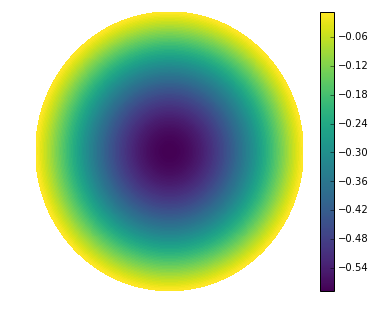

In [244]:
plt.figure(figsize = (6, 5))
plt.pcolor(x1 , y1 , u1, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

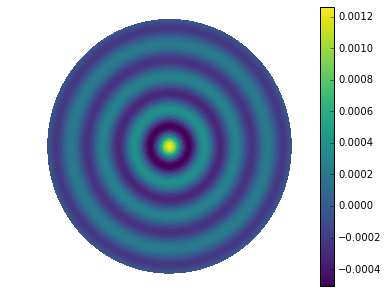

In [246]:
def tambor_nk(t = 0, kth=0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor(1, kth, 50, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_nk, t = (0, 15,.01), n = (0, 10, 1), kth = (0, 10, 1));

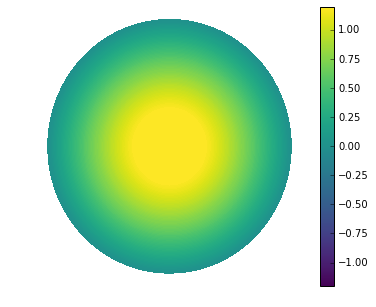

In [249]:
def tambor_nk(t = 0, kth=0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor(1, kth, 50, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis', vmax = 1.2, vmin = -1.2)
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact(tambor_nk, t = (0, 15,.01), n = (0, 10, 1), kth = (0, 10, 1));

**Y ahoara, la solución completa. **

In [256]:
def tambor_n_allk(v, nk_zeros, t):
    r = np.r_[0:1:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nk_zeros)
    lambd = ceros[0]
    u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
    u0 = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
    for cero in range(1, nk_zeros):
        lambd = ceros[cero]
        u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
        u = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

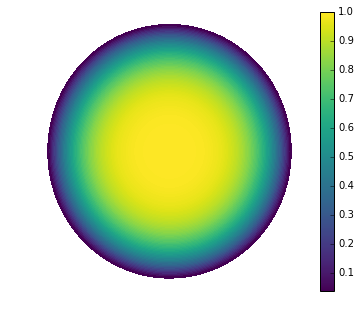

In [257]:
def tambor_0(t = 0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor_n_allk(1, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_0, t = (0, 15,.01));

Fíjise bien, la condición inicial en $t = 0$, se cumple para la  solución encontrada. 

### Tarea

- **Problema 1.** Suponga que $a = 1$, $v = 1$ y que las condiciones iniciales son: 

$$ f(r,\theta) = (1- r^4)\cos(\theta)\quad\quad g(r,\theta) = 0$$

- **Problema 2.** uponga que $a = 2$, $v = 1$ y que las condiciones iniciales son: 
$$ f(r,\theta) = 0 \quad\quad g(r,\theta) = r^2(2- r)\sin^8\left(\frac{\theta}{2}\right)$$



## Fin Modulo 1

### Versión antigua (Lo único que tal vez sirva de algo, son los programas)
Tal vez sirvan de algo para sus tareas. 

Entonces, primero veamos algunos modos normales del sistema. Por ejemplo(demasiado simplificado), 

$$u(r,\theta, t)_{nk} = J_{n}(\lambda_{nk} r)\,\cos(n\theta)\,\cos(\lambda_{nk} v t)$$

La siguiente función se aplica caso simplificado. 

In [3]:
def tambor(n, r_max, v, kth_zero, nt, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nt)
    lamb = ceros[kth_zero]
    u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                 * np.cos(lamb * v * t) for var_r in r])
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u

Entonces, por ejemplo si $n = 1$, $a = 1$, $v = 1$,  $k = 1$ y $t= 0$. Este sería el modo de vibración $(n,k)\rightarrow (1,1)$.

In [4]:
x, y, u = tambor(1, 1, 1, 0, 15, 0)

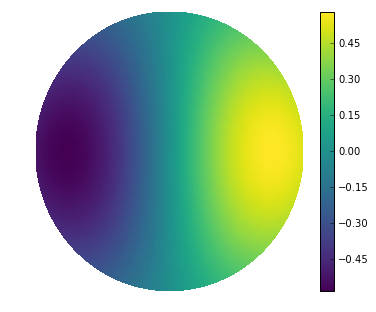

In [5]:
plt.figure(figsize = (6, 5))
plt.pcolor(x, y, u, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

Ahora, veamos como lucen todos demás modos de vibración $(n,k)$. 

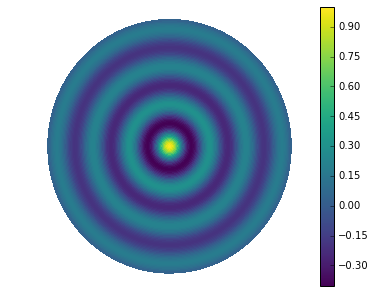

In [6]:
def tambor_nk(t = 0, n = 0, kth=0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor(n, 1, 1, kth, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_nk, t = (0, 15,.01), n = (0, 10, 1), kth = (0, 10, 1));

Ahora, tal vez nos interesaría conocer el comportamiento de la membrana cuando sumamos sobre un conjunto de modos $k$. Es decir, 

$$u(r,\theta, t)_{n} =\sum_{k = 1}u(r,\theta, t)_{nk} =  \sum_{k = 1}J_{n}(\lambda_{nk} r)\,\cos(n\theta)\,\cos(\lambda_{nk} v t) $$
La manera usual de hacer esto es considerar la suma en series de Fourier, es decir a esta suma le falta un coeficiente $A_{nk}$, pero por simplicidad aquí no vamos a considerar este término. 

Una posible función para realizar esto sería, 

In [7]:
def tambor_n_allk(n, r_max, v, nk_zeros, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nk_zeros)
    lamb = ceros[0]
    u0 = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle)
                  * np.cos(lamb * v * t) for var_r in r])
    for cero in range(1, nk_zeros):
        lamb = ceros[cero]
        u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                 * np.cos(lamb * v * t) for var_r in r])
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

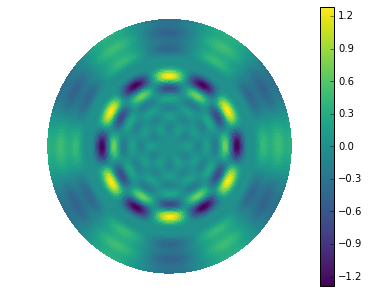

In [8]:
def tambor_n(t = 0, n = 0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor_n_allk(n, 1, 1, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_n, t = (0, 15,.01), n = (0, 10, 1));

Por último, nos queda el caso cuando sumamos sobre todos los modos $n$. Es decir, 

In [37]:
def order_n(n, ceros, nk_zeros, angle, v, r, t):
    lamb = ceros[0]
    u0 = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle)
                      * np.cos(lamb * v * t) for var_r in r])
    for cero in range(1, nk_zeros):
        lamb = ceros[cero]
        u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                     * np.cos(lamb * v * t) for var_r in r])
        u0 += u
    return u0

In [38]:
def tambor(orden_n, r_max, v, nk_zeros, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:100j]
    ceros = special.jn_zeros(0, nk_zeros)
    u0 = order_n(0, ceros, nk_zeros,  angle, v, r, t)
    for n in range(1, orden_n):
        u = order_n(n, ceros, nk_zeros, angle, v, r, t)
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

In [63]:
x, y, u = tambor(10, 1, 1, 5, 5)

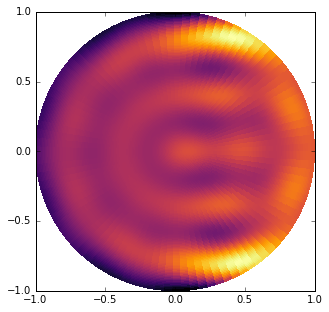

In [64]:
plt.figure(figsize = (5, 5))
plt.pcolor(x, y, u, cmap = 'inferno')
plt.axis('on')
plt.show()